In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
season_start = 2026
season_end = 2040
league = 'BZ-Aging-Only'

In [3]:
df_player_ratings = None
for season in range(season_start, season_end+1):
    file = f"./files/{league}/{season}/output/{league}-{season}-player-data.csv"
    df_temp = pd.read_csv(file)
    df_temp['season'] = season
    df_player_ratings = (
            df_temp
            if df_player_ratings is None
            else pd.concat([df_player_ratings, df_temp])
        )
    
print (df_player_ratings.shape)

(115684, 257)


In [4]:
# df_player_ratings_temp = df_player_ratings.copy(deep=True)
# df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['BABIP'] >= 60) | (df_player_ratings_temp['EYE'] >= 60) | (df_player_ratings_temp['K\'s'] >= 55) | (df_player_ratings_temp['GAP'] >= 55) | (df_player_ratings_temp['POW'] >= 55)]
# unique_ids = df_player_ratings['ID'].unique()

# #find all records with those IDs
# df_player_ratings_temp = df_player_ratings.copy(deep=True)
# df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

# #group by Age 
# df_player_ratings_temp = df_player_ratings.groupby('Age')


# #plot the mean of BABIP, EYE, GAP, POW, K's by Age on same chart with different graphs
# fig, ax = plt.subplots()
# df_player_ratings_temp['BABIP'].max().plot(ax=ax, label='BABAIP')
# df_player_ratings_temp['EYE'].max().plot(ax=ax, label='EYE')
# df_player_ratings_temp['GAP'].max().plot(ax=ax, label='GAP')
# df_player_ratings_temp['POW'].max().plot(ax=ax, label='POW')
# df_player_ratings_temp['K\'s'].max().plot(ax=ax, label='K\'s')
# ax.legend()
# plt.title('Mean of BABIP, EYE, GAP, POW, K\'s by Age')
# plt.xlabel('Age')
# plt.ylabel('Mean Values')
# plt.show()

(14941, 263)
Index(['max_if_range', 'max_of_range', 'max_power', 'max_gap', 'max_eye',
       'max_babip', 'max_avk'],
      dtype='object')


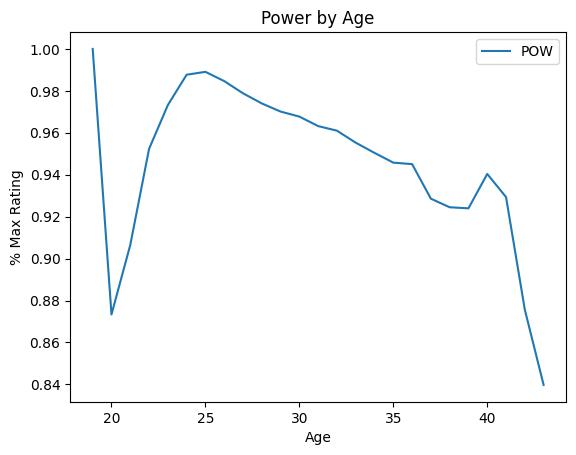

In [5]:
df_max_ratings = pd.DataFrame()
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['POW'] >= 50)]

#load all unique IDs from df_player_ratings into df_max_ratings
df_max_ratings['ID'] = df_player_ratings_temp['ID'].unique()
# set index to ID
df_max_ratings.set_index('ID', inplace=True)


df_player_ratings_temp.set_index('ID', inplace=True)
df_player_ratings_temp_groupby = df_player_ratings_temp.groupby('ID')

df_max_ratings["max_if_range"] = df_player_ratings_temp_groupby['IF RNG'].max()
df_max_ratings["max_of_range"] = df_player_ratings_temp_groupby['OF RNG'].max()
df_max_ratings["max_power"] = df_player_ratings_temp_groupby['POW'].max()
df_max_ratings["max_gap"] = df_player_ratings_temp_groupby['GAP'].max()
df_max_ratings["max_eye"] = df_player_ratings_temp_groupby['EYE'].max()
df_max_ratings["max_babip"] = df_player_ratings_temp_groupby['BABIP'].max()
df_max_ratings["max_avk"] = df_player_ratings_temp_groupby['K\'s'].max()

df_player_ratings_temp = df_player_ratings_temp.merge(df_max_ratings, on='ID')

print(df_player_ratings_temp.shape)
print(df_max_ratings.columns)

df_player_ratings_temp["percent_max_power"] = df_player_ratings_temp['POW'] / df_player_ratings_temp['max_power']
df_player_ratings_temp["percent_max_gap"] = df_player_ratings_temp['GAP'] / df_player_ratings_temp['max_gap']
df_player_ratings_temp["percent_max_eye"] = df_player_ratings_temp['EYE'] / df_player_ratings_temp['max_eye']
df_player_ratings_temp["percent_max_babip"] = df_player_ratings_temp['BABIP'] / df_player_ratings_temp['max_babip']
df_player_ratings_temp["percent_max_avk"] = df_player_ratings_temp['K\'s'] / df_player_ratings_temp['max_avk']
df_player_ratings_temp["percent_max_if_range"] = df_player_ratings_temp['IF RNG'] / df_player_ratings_temp['max_if_range']
df_player_ratings_temp["percent_max_of_range"] = df_player_ratings_temp['OF RNG'] / df_player_ratings_temp['max_of_range']

df_player_ratings_temp_groupby = df_player_ratings_temp.groupby('Age')

fig, ax = plt.subplots()
df_player_ratings_temp_groupby['percent_max_power'].mean().plot(ax=ax, label='POW')
ax.legend()
plt.title('Power by Age')
plt.xlabel('Age')
plt.ylabel('% Max Rating')
plt.show()


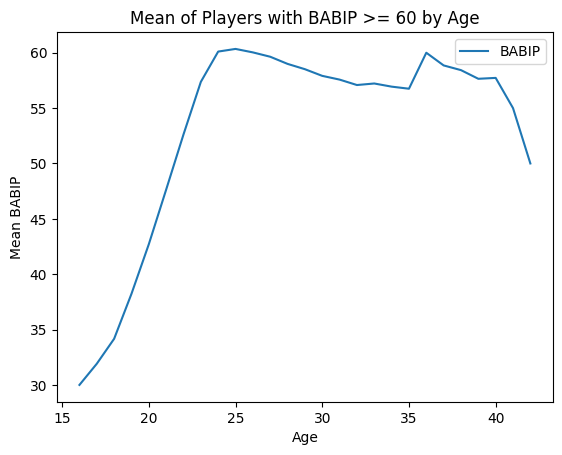

In [6]:
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['BABIP'] >= 60)]
unique_ids = df_player_ratings_temp['ID'].unique()

#find all records with those IDs
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

#group by Age 
df_player_ratings_temp_group = df_player_ratings_temp.groupby('Age')


fig, ax = plt.subplots()
df_player_ratings_temp_group['BABIP'].mean().plot(ax=ax, label='BABIP')
ax.legend()
plt.title('Mean of Players with BABIP >= 60 by Age')
plt.xlabel('Age')
plt.ylabel('Mean BABIP')
plt.show()

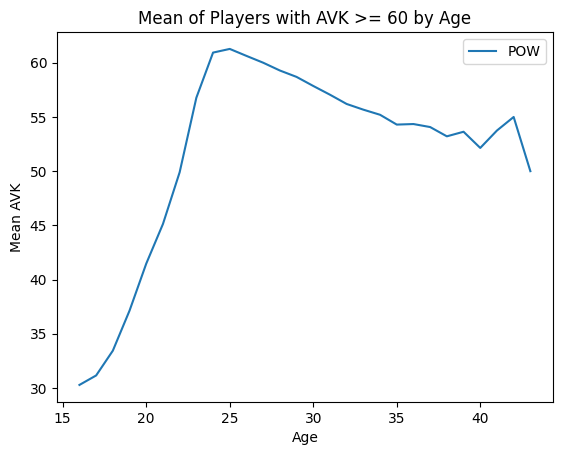

In [7]:
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['K\'s'] >= 60)]
unique_ids = df_player_ratings_temp['ID'].unique()

#find all records with those IDs
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

#group by Age 
df_player_ratings_temp_group = df_player_ratings_temp.groupby('Age')


fig, ax = plt.subplots()
df_player_ratings_temp_group['K\'s'].mean().plot(ax=ax, label='POW')
ax.legend()
plt.title('Mean of Players with AVK >= 60 by Age')
plt.xlabel('Age')
plt.ylabel('Mean AVK')
plt.show()

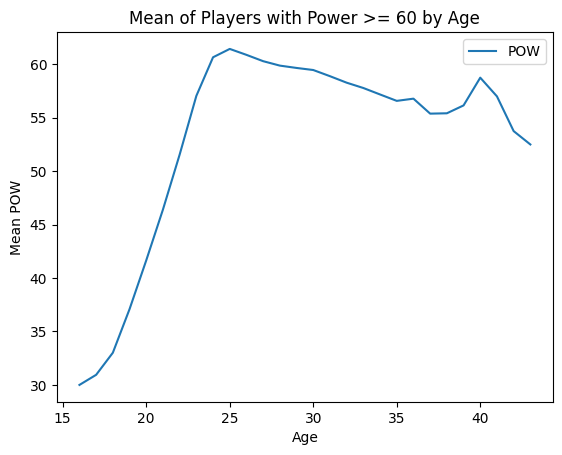

In [8]:
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['POW'] >= 60)]
unique_ids = df_player_ratings_temp['ID'].unique()

#find all records with those IDs
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

#group by Age 
df_player_ratings_temp_group = df_player_ratings_temp.groupby('Age')

# plot number of players with IF Range >= 9 by age
fig, ax = plt.subplots()
df_player_ratings_temp_group['POW'].mean().plot(ax=ax, label='POW')
ax.legend()
plt.title('Mean of Players with Power >= 60 by Age')
plt.xlabel('Age')
plt.ylabel('Mean POW')
plt.show()


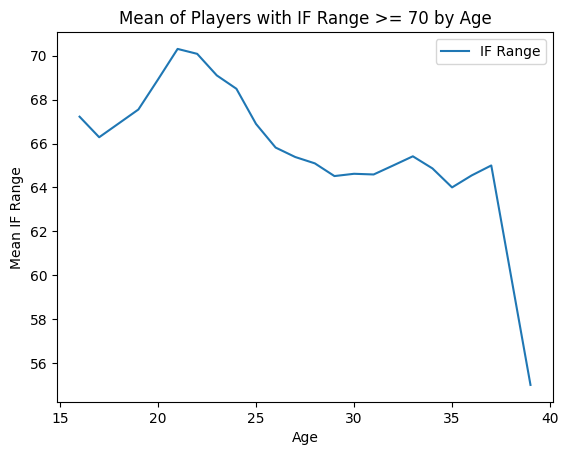

In [9]:
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['IF RNG'] >= 70)]
unique_ids = df_player_ratings_temp['ID'].unique()

#find all records with those IDs
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

#group by Age 
df_player_ratings_temp_group = df_player_ratings_temp.groupby('Age')

# plot number of players with IF Range >= 9 by age
fig, ax = plt.subplots()
df_player_ratings_temp_group['IF RNG'].mean().plot(ax=ax, label='IF Range')
ax.legend()
plt.title('Mean of Players with IF Range >= 70 by Age')
plt.xlabel('Age')
plt.ylabel('Mean IF Range')
plt.show()



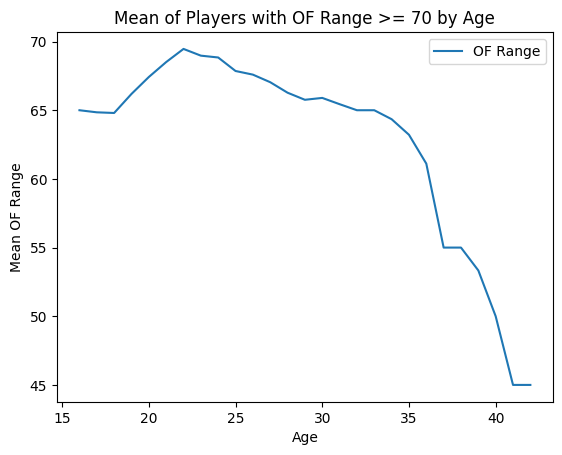

In [10]:
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['OF RNG'] >= 70)]
unique_ids = df_player_ratings_temp['ID'].unique()

#find all records with those IDs
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

#group by Age 
df_player_ratings_temp_group = df_player_ratings_temp.groupby('Age')

# plot number of players with IF Range >= 9 by age
fig, ax = plt.subplots()
df_player_ratings_temp_group['OF RNG'].mean().plot(ax=ax, label='OF Range')
ax.legend()
plt.title('Mean of Players with OF Range >= 70 by Age')
plt.xlabel('Age')
plt.ylabel('Mean OF Range')
plt.show()

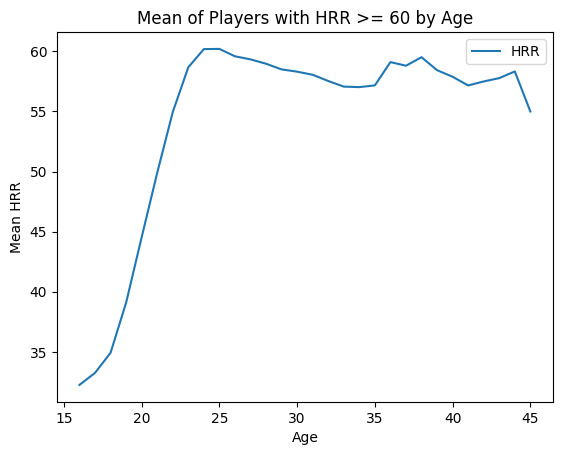

In [11]:
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[(df_player_ratings_temp['HRR'] >= 60)]
unique_ids = df_player_ratings_temp['ID'].unique()

#find all records with those IDs
df_player_ratings_temp = df_player_ratings.copy(deep=True)
df_player_ratings_temp = df_player_ratings_temp[df_player_ratings_temp['ID'].isin(unique_ids)]

#group by Age 
df_player_ratings_temp_group = df_player_ratings_temp.groupby('Age')


fig, ax = plt.subplots()
df_player_ratings_temp_group['HRR'].mean().plot(ax=ax, label='HRR')
ax.legend()
plt.title('Mean of Players with HRR >= 60 by Age')
plt.xlabel('Age')
plt.ylabel('Mean HRR')
plt.show()